In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [32]:
data = pd.read_excel('VU_2.xlsx')
data = data.loc[:, [line for line in data.columns if line in ('Номер карты', 'Sum([Стоимость полная])', 'Телефон')]]
phones = list(data['Телефон'])

In [33]:
data

,Номер карты,Телефон,Sum([Стоимость полная])
0,6287,89502249517; звонить 906 274 18 77 Нурмухаммат...,3105.0
1,74863,"2950160, 8905-220-73-53, звонить маме Наталье ...",4840.0
2,76353,8-921-919-24-22,2700.0
3,92423,+7(921)940-10-65,2400.0
4,98883,"590-47-39, 8921-929-54-73",3000.0
...,...,...,...
2568,990480270,+7(981)883-03-05,1860.0
2569,990495122,"8-921-899-87-56 мама, +7(911)116-34-13 папа",4500.0
2570,990498050,", +7(904)604-74-76",2500.0
2571,990502080,79214429542 Мария Сергеевна (мама),2250.0


In [34]:
pattern = r'\(\d{2}\)'
pattern2 = r'[а-яА-Яa-zA-Z]{1}'

for i, j in enumerate(phones):
    if re.search(pattern, j):
        if '(61)' in j:
            phones[i] = phones[i].replace('(61)', ', 321-61-61, ')
        elif  '(39)' in j:   
            phones[i] = phones[i].replace('(39)', ', 305-73-39, ')
        elif '(73)' in j:
            phones[i] = phones[i].replace('(73)', '')
            phones[i] += ' , 558-73-09 '
        elif ('21') in j:
            phones[i] = phones[i].replace('(21)', '(921)')
    phones[i] = ''.join([x if x not in ',;!:.\\/+' else ' ' for x in j])        
    phones[i] = phones[i].lstrip(' ')
    phones[i] = phones[i].rstrip(' ')
    if re.search(pattern2, phones[i]):
        phones[i] = re.sub(pattern2, '', phones[i])
    phones[i] = ''.join([x for x in phones[i] if x not in '()-'])      

In [35]:
phones2 = phones.copy()

In [36]:
phones2

['89502249517   906 274 18 77       9219820492  ',
 '2950160  89052207353      89217555497',
 '89219192422',
 '79219401065',
 '5904739  89219295473',
 '2277780',
 '3187863   89217534191   89217534192',
 '89119460306  89112140055',
 '8 9213023979    9085855',
 '9465358   79219465358',
 '4527892 9052850033  79118194851',
 '79679682326',
 '89995275678  89215678227    89219542137  ',
 '79117842046        79217431500 ',
 '9217520892 9213910848 2906939',
 '89217548831   89213336978  3664334',
 '79119059819  5850345',
 '89211864727   89213453388 ',
 '7068634  89312678700   89219886867',
 '7720006   79523725970  8 911 157 48 31',
 '79990289115',
 '79119945808   ',
 '79112577063',
 '79117442826   ',
 '79213988651',
 '79117949445',
 '79214262600    79219109522',
 '79218592809',
 '79215750008    ',
 '89213357405   ',
 '79817501977',
 '79818626618  ',
 '79213008174',
 '78126949288  8921 403 33 86  ',
 '79119640907',
 '79811457507            79219538873',
 '79214324762    ',
 '79217726063',
 '79315

In [37]:
for i, j in enumerate(phones2):
    phones2[i] = j.split()

In [38]:
phones2

[['89502249517', '906', '274', '18', '77', '9219820492'],
 ['2950160', '89052207353', '89217555497'],
 ['89219192422'],
 ['79219401065'],
 ['5904739', '89219295473'],
 ['2277780'],
 ['3187863', '89217534191', '89217534192'],
 ['89119460306', '89112140055'],
 ['8', '9213023979', '9085855'],
 ['9465358', '79219465358'],
 ['4527892', '9052850033', '79118194851'],
 ['79679682326'],
 ['89995275678', '89215678227', '89219542137'],
 ['79117842046', '79217431500'],
 ['9217520892', '9213910848', '2906939'],
 ['89217548831', '89213336978', '3664334'],
 ['79119059819', '5850345'],
 ['89211864727', '89213453388'],
 ['7068634', '89312678700', '89219886867'],
 ['7720006', '79523725970', '8', '911', '157', '48', '31'],
 ['79990289115'],
 ['79119945808'],
 ['79112577063'],
 ['79117442826'],
 ['79213988651'],
 ['79117949445'],
 ['79214262600', '79219109522'],
 ['79218592809'],
 ['79215750008'],
 ['89213357405'],
 ['79817501977'],
 ['79818626618'],
 ['79213008174'],
 ['78126949288', '8921', '403', '33',

In [39]:
from functools import reduce


In [40]:
for i, j in enumerate(phones2):
    try:
        phones2[i].append(reduce(lambda x, y: x + y, [z for z in j if len(z) < 7]))
    except:
        continue

In [41]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if x != len(j) - 1:
            if len(y) == 4 and len(j[x + 1]) == 7 and y[:2] in ('79', '89'):
                    phones2[i].append(y + j[x + 1])
            elif y in ('7', '8') and len(j[x + 1]) == 10:
                phones2[i].append(y + j[x + 1])
                


In [42]:
for i, j in enumerate(phones2):
    phones2[i] = [x for x in phones2[i] if len(x) >= 7]

In [43]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if len(y) == 7:
            phones2[i][x] = '7812' + phones2[i][x]
        elif len(y) == 11 and y[0] == '8':
            phones2[i][x] = '7' + y[1:]
        elif len(y) == 10:
            phones2[i][x] = '7' + y

In [44]:
phones2

[['79502249517', '79219820492', '79062741877'],
 ['78122950160', '79052207353', '79217555497'],
 ['79219192422'],
 ['79219401065'],
 ['78125904739', '79219295473'],
 ['78122277780'],
 ['78123187863', '79217534191', '79217534192'],
 ['79119460306', '79112140055'],
 ['79213023979', '78129085855', '79213023979'],
 ['78129465358', '79219465358'],
 ['78124527892', '79052850033', '79118194851'],
 ['79679682326'],
 ['79995275678', '79215678227', '79219542137'],
 ['79117842046', '79217431500'],
 ['79217520892', '79213910848', '78122906939'],
 ['79217548831', '79213336978', '78123664334'],
 ['79119059819', '78125850345'],
 ['79211864727', '79213453388'],
 ['78127068634', '79312678700', '79219886867'],
 ['78127720006', '79523725970', '79111574831'],
 ['79990289115'],
 ['79119945808'],
 ['79112577063'],
 ['79117442826'],
 ['79213988651'],
 ['79117949445'],
 ['79214262600', '79219109522'],
 ['79218592809'],
 ['79215750008'],
 ['79213357405'],
 ['79817501977'],
 ['79818626618'],
 ['79213008174'],
 

In [45]:
data['Чистые_телефоны'] = phones2

In [46]:
data

,Номер карты,Телефон,Sum([Стоимость полная]),Чистые_телефоны
0,6287,89502249517; звонить 906 274 18 77 Нурмухаммат...,3105.0,"[79502249517, 79219820492, 79062741877]"
1,74863,"2950160, 8905-220-73-53, звонить маме Наталье ...",4840.0,"[78122950160, 79052207353, 79217555497]"
2,76353,8-921-919-24-22,2700.0,[79219192422]
3,92423,+7(921)940-10-65,2400.0,[79219401065]
4,98883,"590-47-39, 8921-929-54-73",3000.0,"[78125904739, 79219295473]"
...,...,...,...,...
2568,990480270,+7(981)883-03-05,1860.0,[79818830305]
2569,990495122,"8-921-899-87-56 мама, +7(911)116-34-13 папа",4500.0,"[79218998756, 79111163413]"
2570,990498050,", +7(904)604-74-76",2500.0,[79046047476]
2571,990502080,79214429542 Мария Сергеевна (мама),2250.0,[79214429542]


In [47]:
reklama = pd.read_excel(r'17 неделя (20-26) обратный звонок.xlsx')

In [48]:
reklama_numbers = [str(i) for i in list(reklama['Телефон'])]  

In [49]:
reklama_numbers

['79217481355',
 '79214295545',
 '79967968725',
 '79213035985',
 '79119783189',
 '79312205157',
 '79117635983',
 '79213030813',
 '79118332312',
 '79650385472',
 '79218551776',
 '79313205030',
 '79218969940',
 '79119644463',
 '78911950914',
 '79217883252',
 '79119880131',
 '79818189110',
 '79217748752',
 '79062264766',
 '79046326098',
 '79523728876',
 '79819843830',
 '79523739922',
 '79217436204',
 '79110284607',
 '79136726950',
 '79633264707',
 '79217662321']

In [85]:
# arr = []
# for i, j in enumerate(data['Чистые_телефоны']):
#     arr.append([])
#     for x in j:
#         if x in reklama_numbers:
#             arr[i].append(True)
#         else:
#             arr[i].append(False)
            

In [50]:
# Обратная проверка
arr2 = []
for i, j in enumerate(reklama_numbers):
    arr2.append([])
    for k in data['Чистые_телефоны']:
        for l in k:
            if j in l:
                arr2[i].append(l)
                print(j, l, k)
            

79217883252 79217883252 ['79217883252']
79217883252 79217883252 ['79217883252']
79119880131 79119880131 ['79119880131']


In [51]:
arr2

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['79217883252', '79217883252'],
 ['79119880131'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [60]:
for i, j in enumerate(arr):
    arr[i] = any(j)

In [61]:
data['reklama'] = arr 

In [62]:
data['reklama'].value_counts()

False    2573
Name: reklama, dtype: int64

In [24]:
data[data['reklama'] == True]

,Номер карты,Sum([Стоимость полная]),Телефон,Чистые_телефоны,reklama
9026,100176026,7500.0,", +7(921)574-13-28",[79215741328],True
9532,100178853,3000.0,", +7(931)578-84-18",[79315788418],True
10013,120095359,2700.0,89312666262мама папа +7-905-257-66-26,"[79312666262, +79052576626]",True
15862,120473123,3000.0,", +7(921)950-96-65, 9219531004 жена Елена!!!","[+79219509665,, 79219531004]",True
16561,120505988,4100.0,", +7(921)326-40-52",[79213264052],True
19709,120580367,3000.0,", +7(911)128-62-60",[79111286260],True
20292,260001556,4500.0,", +7(921)936-92-22",[79219369222],True


In [25]:
data.to_excel("output.xlsx")

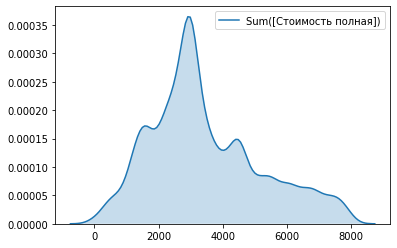

In [26]:
import seaborn as sns

snsplot = sns.kdeplot(data[data['Sum([Стоимость полная])'] < 8000]['Sum([Стоимость полная])'], shade=True)
fig = snsplot.get_figure()

In [27]:
data['Sum([Стоимость полная])'].mean()

6868.765088905941

In [28]:
data['Sum([Стоимость полная])'].median()

3908.0